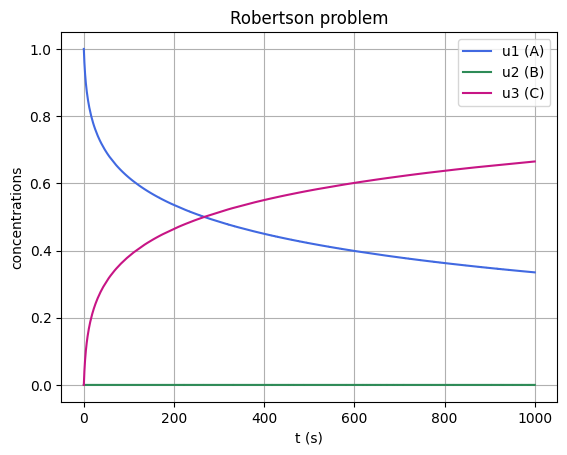

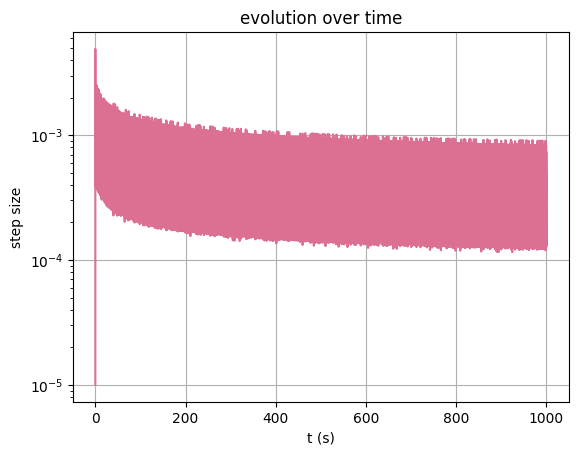

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def robertson(t, u):
    u1, u2, u3 = u
    du1_h = -0.04 * u1 + 1e4 * u2 * u3
    du2_h = 0.04 * u1 - 1e4 * u2 * u3 - 3e7 * u2**2
    du3_h = 3e7 * u2**2
    return np.array([du1_h, du2_h, du3_h])

def ab2(f, u, h, f_prev):
    return u + h*((3/2)*f - (1/2)*f_prev)

def ab3(f, u, h, f_prev1, f_prev2):
    return u + h*((23/12)*f - (4/3)*f_prev1 + (5/12)*f_prev2)

def ab_adaptive(f, u0, t0, tf, h0, tol):
    t_vals = [t0]
    u_vals = [u0]
    h_vals = [h0]

    u = u0
    t = t0
    h = h0

    f_prev = robertson(t, u)

    while t < tf:
        u_ab2 = ab2(f_prev, u, h, f_prev)
        f_ab2 = robertson(t + h, u_ab2)

        if len(u_vals) > 1:
            f_prev1 = robertson(t - h_vals[-1], u_vals[-1])
            f_prev2 = robertson(t - h_vals[-2], u_vals[-2])
            u_ab3 = ab3(f_prev, u, h, f_prev1, f_prev2)
            error = np.linalg.norm(u_ab3 - u_ab2, ord=np.inf)
        else:
            u_ab3 = u_ab2
            error = tol / 2

        if error < tol:
            t += h
            u = u_ab3
            f_prev = robertson(t, u)
            t_vals.append(t)
            u_vals.append(u)
            h_vals.append(h)
            h = min(h * 1.1, tf - t)
        else:
            h *= 0.5
        if h < 1e-12:
            break

    return np.array(t_vals), np.array(u_vals), np.array(h_vals)

# initial conditions
u0 = np.array([1.0, 0.0, 0.0])
t0 = 0
tf = 1000
h0 = 1e-5
tol = 1e-6

t_vals, u_vals, h_vals = ab_adaptive(robertson, u0, t0, tf, h0, tol)

plt.plot(t_vals, u_vals[:, 0], label='u1 (A)', color='royalblue')
plt.plot(t_vals, u_vals[:, 1], label='u2 (B)', color='seagreen')
plt.plot(t_vals, u_vals[:, 2], label='u3 (C)', color='mediumvioletred')
plt.xlabel('t (s)')
plt.ylabel('concentrations')
plt.title('Robertson problem')
plt.legend()
plt.grid(True)
plt.show()

plt.semilogy(t_vals[1:], h_vals[1:], color='palevioletred')
plt.xlabel('t (s)')
plt.ylabel('step size')
plt.title('evolution over time')
plt.grid(True)
plt.show()